In [201]:
from rdkit import Chem
from rdkit.Chem import AllChem

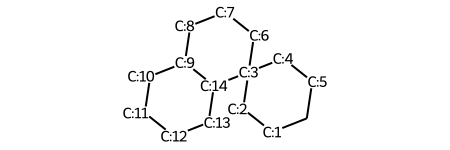

In [202]:
mol = Chem.MolFromSmiles("C1CCC2(CC1)CCCC1CCCCC21")
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(mol)

[CH2:1].[CH2:4][CH2:5]


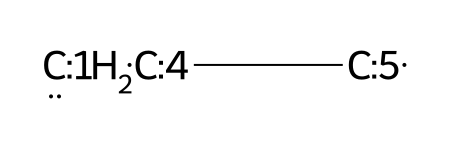

In [203]:
atoms = [5, 4, 1]
smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
print(smiles)
mol = Chem.MolFromSmiles(smiles)
mol

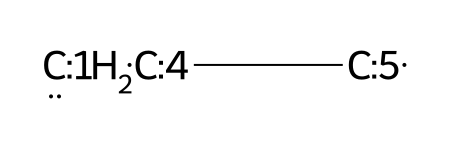

In [204]:
Chem.MolFromSmiles(Chem.MolToSmiles(mol))

In [206]:
import itertools

def copy_atom(atom):
    new_atom = Chem.Atom(atom.GetSymbol())
    new_atom.SetFormalCharge(atom.GetFormalCharge())
    new_atom.SetAtomMapNum(atom.GetAtomMapNum())
    return new_atom

def copy_edit_mol(mol): 

    new_mol = Chem.RWMol(Chem.MolFromSmiles(''))
    for atom in mol.GetAtoms():
        new_atom = copy_atom(atom)
        new_mol.AddAtom(new_atom)

    subset_possible_bonds = list(itertools.combinations(mol.GetAtoms(), 2))
    subset = [(bond[0].GetIdx(), bond[1].GetIdx()) for bond in subset_possible_bonds]
    print(subset)
    
    for bond in subset:
        a1, a2 = bond[0], bond[1]
        bond_obj = mol.GetBondBetweenAtoms(a1, a2)
        if bond_obj:
            new_mol.AddBond(a1, a2, order=bond_obj.GetBondType())
        else:
            new_mol.AddBond(a1, a2, order=Chem.BondType.UNSPECIFIED)

    return new_mol


copied_mol = copy_edit_mol(mol)
copied_smiles = Chem.MolToSmiles(copied_mol)
print(copied_smiles)
copied_mol = Chem.RemoveHs(copied_mol)

[(0, 1), (0, 2), (1, 2)]
[CH4:1]1~[CH3:4][CH3:5]~1


In [207]:
Chem.MolFromSmiles(copied_smiles)

[00:18:10] Explicit valence for atom # 0 C, 5, is greater than permitted


In [208]:
for bond in copied_mol.GetBonds():
    print(int(bond.GetBondTypeAsDouble()))

0
0
1


In [209]:
mol = copied_mol
[(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs()) for atom in mol.GetAtoms()]

[('C', 0, 4), ('C', 0, 3), ('C', 0, 3)]

In [210]:
copied_mol2 = Chem.AddHs(copied_mol)
AllChem.EmbedMolecule(copied_mol2,randomSeed=0xf00d)
print(Chem.MolToMolBlock(copied_mol2))


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
   -0.4330    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  4  0  0
   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
    0.9993    1.0853    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1651   -0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1651    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9993   -1.0853    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1830    2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9184    0.5413    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2402    1.6117    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1830   -2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2402   -1.6117    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9184   -0.5413    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  0  0
  1  3  0  0

[00:18:10] UFFTYPER: Unrecognized atom type: C_6 (0)
[00:18:10] UFFTYPER: Unrecognized atom type: C_5 (1)
[00:18:10] UFFTYPER: Unrecognized atom type: C_5 (2)


In [211]:
print(type(Chem.BondType.ZERO))


<class 'rdkit.Chem.rdchem.BondType'>


In [212]:
dir(Chem.BondType)

['AROMATIC',
 'DATIVE',
 'DATIVEL',
 'DATIVEONE',
 'DATIVER',
 'DOUBLE',
 'FIVEANDAHALF',
 'FOURANDAHALF',
 'HEXTUPLE',
 'HYDROGEN',
 'IONIC',
 'ONEANDAHALF',
 'OTHER',
 'QUADRUPLE',
 'QUINTUPLE',
 'SINGLE',
 'THREEANDAHALF',
 'THREECENTER',
 'TRIPLE',
 'TWOANDAHALF',
 'UNSPECIFIED',
 'ZERO',
 '__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__